### Solve Differential Equations in Python
An example of using ODEINT is with the following differential equation with parameter $k=0.3$, the initial condition $y0=5$ and the following differential equation.       
\begin{equation*}
\frac{dy(t)}{dt} = -k \; y(t)
\end{equation*}

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

### Fixed k = 0.3

In [2]:
def model(y,t):
    k = 0.3
    dydt = -k * y
    return dydt

In [3]:
# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODE
y = odeint(model,y0,t)

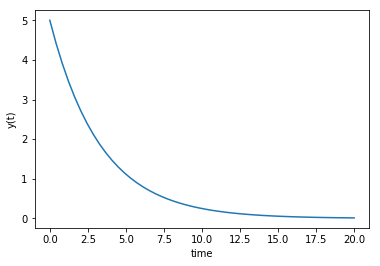

In [4]:
# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

### Flexible k = 0.1, 0.2, 0.5

In [5]:
def model(y,t,k):
    dydt = -k * y
    return dydt

In [6]:
k = 0.1
y1 = odeint(model,y0,t,args=(k,))
k = 0.2
y2 = odeint(model,y0,t,args=(k,))
k = 0.5
y3 = odeint(model,y0,t,args=(k,))

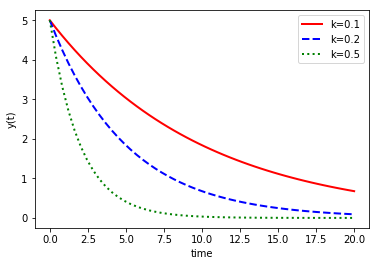

In [7]:
# plot results
plt.plot(t,y1,'r-',linewidth=2,label='k=0.1')
plt.plot(t,y2,'b--',linewidth=2,label='k=0.2')
plt.plot(t,y3,'g:',linewidth=2,label='k=0.5')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

### Example 1:

\begin{equation*}
\frac{dy(t)}{dt} = -y(t) + 1  \\
y(0) = 0 
\end{equation*}

In [8]:
def model_1(y,t):
    dydt = -y + 1
    return dydt
y0 = 0

In [9]:
t = np.linspace(0,5)
y = odeint(model_1,y0,t)

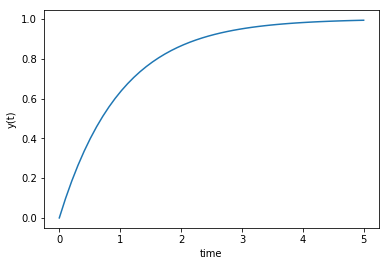

In [10]:
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

### Example 2:

\begin{equation*}
    5 \; \frac{dy(t)}{dt} = -y(t) + u(t)\\
    y(0) = 1 \\
\end{equation*}   
$u$ steps from 0 to 2 at $t = 10$

In [11]:
def model_2(y,t):
    if t<10.0:
        u = 0
    else:
        u = 2
    dydt = (-y + u)/5.0
    return dydt
y0 = 1

In [12]:
t = np.linspace(0,40,1000)
y = odeint(model_2,y0,t)

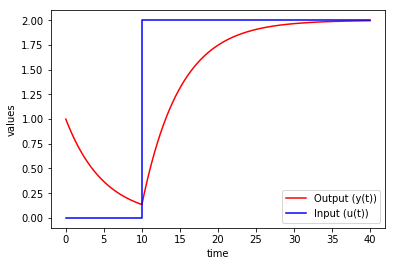

In [13]:
plt.plot(t,y,'r-',label='Output (y(t))')
plt.plot([0,10,10,40],[0,0,2,2],'b-',label='Input (u(t))')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

### Example 3:
Solve for $x(t)$ and $y(t)$ and show that the solutions are equivalent.            
\begin{equation*}
    \frac{dx(t)}{dt} = 3 \; exp(-t) \\
    \frac{dy(t)}{dt} = 3 - y(t) \\
    x(0) = 0 \\
    y(0) = 0 \\
\end{equation*}

In [14]:
def model_3(z,t):
    dxdt = 3.0 * np.exp(-t)
    dydt = -z[1] + 3
    dzdt = [dxdt,dydt]
    return dzdt

In [15]:
z0 = [0,0]
t = np.linspace(0,5)
z = odeint(model_3,z0,t)

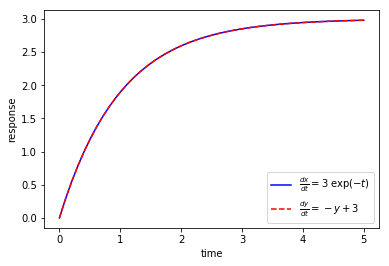

In [16]:
plt.plot(t,z[:,0],'b-',label=r'$\frac{dx}{dt}=3 \; \exp(-t)$')
plt.plot(t,z[:,1],'r--',label=r'$\frac{dy}{dt}=-y+3$')
plt.ylabel('response')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

### Example 4
\begin{equation*}
    2 \; \frac{dx(t)}{dt} = -x(t) + u(t) \\
    5 \; \frac{dy(t)}{dt} = -y(t) + x(t) \\
    u = 2 \, S(t-5), \; x(0) = 0, \; y(0) = 0 \\
\end{equation*}

where $S(t−5)$ is a step function that changes from zero to one at $t=5$. When it is multiplied by two, it changes from zero to two at that same time, $t=5$.

In [17]:
def model_4(z,t):
    if t<5.0:
        u = 0
    else:
        u = 2
    dxdt = -0.5*z[0] + 0.5*u
    dydt = -0.2*z[1] + 0.2*z[0]
    dzdt = [dxdt,dydt]
    return dzdt

In [18]:
z0 = [0,0]
t = np.linspace(0,40,401)
u = np.zeros(401)
u[51:] = 2.0 
z = odeint(model_4,z0,t)

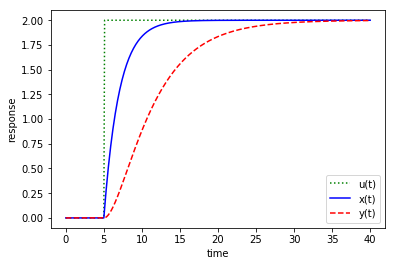

In [19]:
plt.plot(t,u,'g:',label='u(t)')
plt.plot(t,z[:,0],'b-',label='x(t)')
plt.plot(t,z[:,1],'r--',label='y(t)')
plt.ylabel('response')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()